$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




Ques 2:

 Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [ ]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  H = [[3000,4],[4,2]]
  return H


#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  ev,evs = np.linalg.eig(A)
  return max(ev)/min(ev)

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

#Ques 4:
 Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

Condition number of matrix $\mathbf{Q}$ needs to be analyzed in new gradient scheme with scaling  with $\mathbf{D}^k$ \\

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function at each iteration.

$\mathbf{D}^k$ is shown in the question 5 below.

Condition Number of matrix $\mathbf{Q}$ in the Gradient Descent Scheme has reduced to nearly $1$ due to such choice of matrix $\mathbf{Q}$ so that our gradient descent  algorithm with scaling becomes more accurate and fast.

#Ques 5:
 Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)? \\
#Answer: 
Diagonal approximation to the Hessian matrix $\nabla^2f( \mathbf{x})$, i.e., the diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. This improves the performance of the gradient method dramatically, by providing automatic scaling of the units in which the components $x_i$ of $\mathbf{x}$ are measured. Because of such choice of $\mathbf{D}^k$, the condition number of $\mathbf{Q}$ is improving and becoming so close to $1$ so that our gradient descent scheme is converging so quickly. Here, product with inverse of diagonal elements of hessian matrix with hessian matrix is causing the improvements in $\mathbf{Q}$ by becoming so close to condition number of identity matrix. This is so helpful in fasterness of the algorithm.

$\therefore \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{2000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix}$

Write code to find the matrix $\mathbf{D}^k$. 

In [ ]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  return np.array([[1/3000,0],[0,1/2]])
  

In [ ]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 1500*x[0]**2 + 4*x[0]*x[1] + x[1]**2

In [ ]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([(3000*x[0]+4*x[1]),(4*x[0]+2*x[1])])
  

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  step_length = np.dot(gradf,gradf)/np.dot(gradf,np.matmul(2*A,gradf))
  return step_length
  

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p=-evalg(x)
  #implement the backtracking line search
  while evalf(x+alpha*p)>evalf(x)+gamma*alpha*np.dot(evalg(x),p):
    alpha = rho*alpha

  #print('final step length:',alpha)
  return alpha
  
  

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  p=-gradf
  alpha=alpha_start
  D_k=compute_D_k(x)
  
  while evalf(x+alpha*np.matmul(D_k,p))>evalf(x)+gamma*alpha*np.matmul(np.matrix.transpose(gradf),np.matmul(D_k,p)):
    alpha = rho*alpha

  #print('final step length:',alpha)
  return alpha

In [ ]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x , k , evalf(x) 


In [ ]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)
  D_k=compute_D_k(x)


  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k,g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x , k , evalf(x) 


  #Complete the code   

Ques 7&8.

In [ ]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [ ]:
#check gradient descent with exact line search
print("For Gradient Descent with exact line search:") 
optimizer,k,min_value=find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer Value :",optimizer)
print("Minimum value : ",min_value)

For Gradient Descent with exact line search:
Minimizer Value : [-7.44595231e-16  4.61544291e-13]
Minimum value :  2.1248011077899476e-25


In [ ]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("For Gradient Descent with backtracking line search:") 
optimizer_bls,k_bls,min_value_bls=find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print("Minimizer Value :",optimizer_bls)
print("Number of iterations :",k_bls)
print("Minimum value : ",min_value_bls)

For Gradient Descent with backtracking line search:
Minimizer Value : [-4.78532202e-16  4.53575301e-13]
Number of iterations : 21985
Minimum value :  2.0520584176089396e-25


In [ ]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
opt_bls_scaling,k_scaling,fun_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print("For Gradient Descent with backtracking line search and with scaling:") 
print("Minimizer Value :",opt_bls_scaling)
print("Number of iterations :",k_scaling)
print("Minimum value : ",fun_scaling)


For Gradient Descent with backtracking line search and with scaling:
Minimizer Value : [-3.51831747e-16  1.40072073e-14]
Number of iterations : 166543
Minimum value :  3.621675026196464e-28


Observation : \\
Minimum value using Gradient Descent Algorithm with scaling is 3.621675026196464e-28 i.e., $10^{-28}$whereas minimum value using Gradient Descent Algorithm without scaling is 2.0520584176089396e-25 i.e., $10^{-25}$ so we can clearly observe that with scaling we got more accuracy \\
Number of iterations are more with gradient descent algorithm with scaling 

Ques 9.

In [ ]:
alpha_values=[1.,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
obj_function=[]
final_minimizer=[]
number_of_iterations=[]
print("For Gradient Descent with backtracking line search:")
for alpha in alpha_values:
  print("for alpha = ",alpha)
  optimizer_bls,k_bls,min_value_bls=find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  print("   Minimizer Value :",optimizer_bls,"   Number of iterations :",k_bls,"   Minimum value : ",min_value_bls)
  number_of_iterations.append(k_bls)
  obj_function.append(min_value_bls)
  final_minimizer.append(optimizer_bls)


For Gradient Descent with backtracking line search:
for alpha =  1.0
   Minimizer Value : [-4.78532202e-16  4.53575301e-13]    Number of iterations : 21985    Minimum value :  2.0520584176089396e-25
for alpha =  0.9
   Minimizer Value : [-5.48799355e-16  4.71515450e-13]    Number of iterations : 15941    Minimum value :  2.2174352131747877e-25
for alpha =  0.75
   Minimizer Value : [-7.18643891e-16  4.89175378e-13]    Number of iterations : 6750    Minimum value :  2.386610528547938e-25
for alpha =  0.6
   Minimizer Value : [-6.07554226e-16  4.94036636e-13]    Number of iterations : 6887    Minimum value :  2.43425264283868e-25
for alpha =  0.5
   Minimizer Value : [-4.78532202e-16  4.53575301e-13]    Number of iterations : 21985    Minimum value :  2.0520584176089396e-25
for alpha =  0.4
   Minimizer Value : [-7.24091328e-16  4.84454819e-13]    Number of iterations : 11362    Minimum value :  2.3407977615582728e-25
for alpha =  0.25
   Minimizer Value : [-4.78532202e-16  4.53575301e-1

In [ ]:
alpha_values=[1.,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
obj_function_scaling=[]
final_minimizer_scaling=[]
number_of_iterations_scaling=[]
print("For Gradient Descent with backtracking line search and with scaling:")
for alpha in alpha_values:
  print("for alpha = ",alpha)
  opt_bls_scaling,k_scaling,fun_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  print("   Minimizer Value :",opt_bls_scaling,"   Number of iterations :",k_scaling,"   Minimum value : ",fun_scaling)
  obj_function_scaling.append(fun_scaling)
  final_minimizer_scaling.append(opt_bls_scaling)
  number_of_iterations_scaling.append(k_scaling)

For Gradient Descent with backtracking line search and with scaling:
for alpha =  1.0
   Minimizer Value : [-3.51831747e-16  1.40072073e-14]    Number of iterations : 166543    Minimum value :  3.621675026196464e-28
for alpha =  0.9
   Minimizer Value : [-3.51880583e-16  1.40092586e-14]    Number of iterations : 184254    Minimum value :  3.6227089793308317e-28
for alpha =  0.75
   Minimizer Value : [-3.51884177e-16  1.40095324e-14]    Number of iterations : 218081    Minimum value :  3.622817796715079e-28
for alpha =  0.6
   Minimizer Value : [-3.51873160e-16  1.40090769e-14]    Number of iterations : 139417    Minimum value :  3.6225864420281724e-28
for alpha =  0.5
   Minimizer Value : [-3.51831747e-16  1.40072073e-14]    Number of iterations : 166543    Minimum value :  3.621675026196464e-28
for alpha =  0.4
   Minimizer Value : [-3.51878054e-16  1.40093757e-14]    Number of iterations : 205524    Minimum value :  3.6227148828944126e-28
for alpha =  0.25
   Minimizer Value : [-3.51

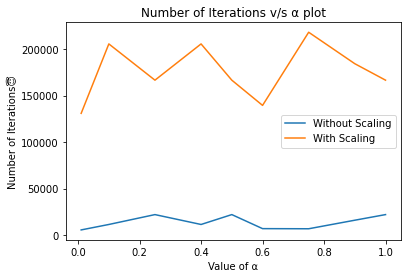

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alpha_values,number_of_iterations)
plt.plot(alpha_values,number_of_iterations_scaling) 
plt.xlabel('Value of ⍺')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations v/s α plot')
plt.legend(["Without Scaling","With Scaling"])
plt.show()

Observation : \\
Number of iterations for Gradient Descent with backtracking line search with scaling are very much as compared to number of iterations without scaling.And we dont see any major change effect on number of iterations w.r.t. change in value of alpha. 

Ques 10:

In [ ]:
rho_values=[0.9,0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
alpha_start=1.0
gamma=0.5
obj_function=[]
final_minimizer=[]
number_of_iterations=[]
print("For Gradient Descent with backtracking line search:")
for rho in rho_values:
  print("for rho = ",rho)
  optimizer_bls,k_bls,min_value_bls=find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  print("   Minimizer Value :",optimizer_bls,"   Number of iterations :",k_bls,"   Minimum value : ",min_value_bls)
  number_of_iterations.append(k_bls)
  obj_function.append(min_value_bls)
  final_minimizer.append(optimizer_bls)

For Gradient Descent with backtracking line search:
for rho =  0.9
   Minimizer Value : [-6.44686128e-16  4.90962904e-13]    Number of iterations : 127    Minimum value :  2.404019351870065e-25
for rho =  0.8
   Minimizer Value : [-6.99968590e-16  4.40149178e-13]    Number of iterations : 1471    Minimum value :  1.932338703071826e-25
for rho =  0.75
   Minimizer Value : [-7.15454842e-16  4.83616543e-13]    Number of iterations : 3135    Minimum value :  2.332687511412074e-25
for rho =  0.6
   Minimizer Value : [-7.07691748e-16  4.70469643e-13]    Number of iterations : 15834    Minimum value :  2.2076113616544364e-25
for rho =  0.5
   Minimizer Value : [-4.78532202e-16  4.53575301e-13]    Number of iterations : 21985    Minimum value :  2.0520584176089396e-25
for rho =  0.4
   Minimizer Value : [-5.16461460e-16  4.67846629e-13]    Number of iterations : 20049    Minimum value :  2.1831406770108246e-25
for rho =  0.25
   Minimizer Value : [-5.67128954e-16  4.70177132e-13]    Number of 

In [86]:
obj_function_scaling=[]
final_minimizer_scaling=[]
number_of_iterations_scaling=[]
print("For Gradient Descent with backtracking line search with scaling:")
for rho in rho_values:
  print("for rho = ",rho)
  opt_bls_scaling,k_scaling,fun_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  print("   Minimizer Value :",opt_bls_scaling,"   Number of iterations :",k_scaling,"   Minimum value : ",fun_scaling)
  obj_function_scaling.append(fun_scaling)
  final_minimizer_scaling.append(opt_bls_scaling)
  number_of_iterations_scaling.append(k_scaling)

For Gradient Descent with backtracking line search with scaling:
for rho =  0.9
   Minimizer Value : [-3.51776084e-16  1.39972555e-14]    Number of iterations : 121440    Minimum value :  3.6184718200920344e-28
for rho =  0.8
   Minimizer Value : [-3.51791766e-16  1.40037789e-14]    Number of iterations : 125092    Minimum value :  3.620363360810124e-28
for rho =  0.75
   Minimizer Value : [-3.51805130e-16  1.40062741e-14]    Number of iterations : 127959    Minimum value :  3.6211607293046916e-28
for rho =  0.6
   Minimizer Value : [-3.51829291e-16  1.40073153e-14]    Number of iterations : 144172    Minimum value :  3.621679222287128e-28
for rho =  0.5
   Minimizer Value : [-3.51831747e-16  1.40072073e-14]    Number of iterations : 166543    Minimum value :  3.621675026196464e-28
for rho =  0.4
   Minimizer Value : [-3.51893226e-16  1.40099350e-14]    Number of iterations : 155961    Minimum value :  3.6230153870288696e-28
for rho =  0.25
   Minimizer Value : [-3.51883626e-16  1.4009

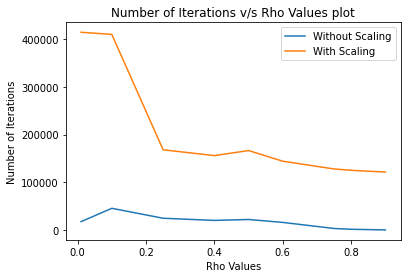

In [87]:
plt.plot(rho_values,number_of_iterations)
plt.plot(rho_values,number_of_iterations_scaling) 
plt.xlabel('Rho Values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations v/s Rho Values plot')
plt.legend(["Without Scaling","With Scaling"])
plt.show()

Observation : \\
Number of iterations for Gradient Descent with backtracking line search with scaling are very much as compared to number of iterations without scaling.For Gradient Descnt with backtracking line search With scaling with increase in rho values number of iterations decreases ,initially we can see a very much change in number of iterations from 0.0 to 0.2 and then it decreases minorly.